In [30]:
import pandas as pd

data_path=""

adv=pd.read_csv(data_path+'Advertising.csv', index_col=0)
adv.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [31]:
import numpy as np
# Y is a response variable
Y = sales = adv['sales']

# Antag att regressionen av "TV" på "sales" är ungefär linjär,
# Y = β0+ β1X
# sales = β0 + β1 * 'TV'
# Modellspecifikationsmatrisen (designmatrisen) behöver en 1:a i första kolumnen

X = TV = np.column_stack([np.ones(Y.shape[0]), adv['TV']])
Y



1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [33]:
# pseudo-invers för prestanda
# @ = matrismultiplikation

b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b


array([7.03259355, 0.04753664])

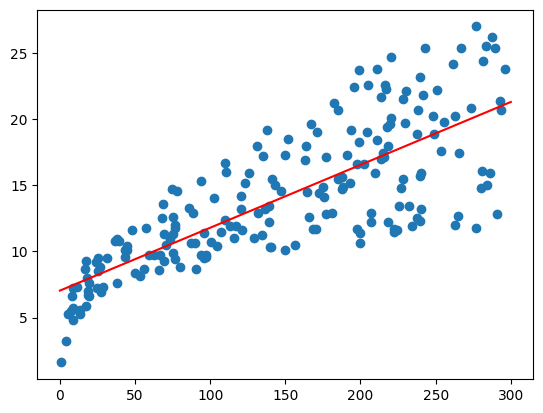

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 1], Y)
x = np.linspace(0,300)

y_hat=b[0]+ b[1]*x 
plt.plot(x,y_hat, c="red");


In [34]:
# RSS Residual Sum of Squares
# SSE Sum of Square Errors
# Samma sak!

n = Y.shape[0]  # stickprovets storlek
v = X.shape[1] - 1  # antalet parametrar, bara TV i detta fall, så 1

SSE = np.sum(np.square(Y - (X @ b)))
SSE


np.float64(2102.530583131351)

$\texttt{Cov}(X,Y)= E[(x-\mu_X)(y-\mu_Y)]$

$S_{xy} \rightarrow (x-mu_X)(y-mu_Y)$

Om X och Y är oberoende så är Cov(X, Y)= 0 men vi kan inte anta det omvända. Dvs Cov=0 betyder inte nödvändigtvis att X och Y är oberoende, men de är åtminstone inte linjärt beroende.

En starkare egenskap är korrelation (Pearson coefficient of correlation), som är ett värde mellan -1 och 1 (inklusive ändpunkterna).

Låt $X$ och $Y$ vara slumpvariabler med medel $\mu_X$ resp. $\mu_Y$ samt varianser $\sigma_X^2$ och $\sigma_Y^2$. Korrelationen mellan $X$ och $Y$ ges då av:

\begin{equation*}
\rho_{XY}= \frac{\texttt{Cov(X,Y)}}{\sqrt{(Var X)(Var Y)}} 
\end{equation*}

Om pearsonkoefficienten är 1 eller -1 ($|\rho_{XY}|=1$), så har vi visat att det finns en ekvation:

$Y = \beta_0 + \beta_1X$

In [14]:
var=SSE/(n-v-1)
S = np.sqrt(var) # residual standard error, alltså en uppskattning av standrardfelet/stickprovsavvikelsen

SSR = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))/n)        # Sum of squares regression     - riktig, ej skattning

Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)
Sxx = np.sum(np.square(X)) - (np.square(np.sum(X))/n)

se = var / n        # Standard error (of the mean)

# square of standard error of β1 = var/Sxx
se_b=var/Sxx

ci = (b[1], 2*np.sqrt(se_b))        # confidence interval
print(f"Confidence interval of predictor β1: {ci[0]:.4f} +- {ci[1]:.4f}")


Confidence interval of predictor β1: 0.0475 +- 0.0055


Detta är väldigt ungefärligt ett 90% interval (<2 sigma). Om vi kör regressionen många gånger på delmängder av datan (som ska ha samma medel, dvs vara balanserade), så väntar vi oss att 90% av värdena hamnar mellan 0,042 och 0,053

In [18]:
x_mean=np.mean(X[:,1])
se_intercept = var * (1/n * (np.square(x_mean)/(np.square(np.sum(X-x_mean)))))      #FEL!
se_intercept

# borde bli [6,130, 7,935]
b[0]

np.float64(7.032593549127828)

### Hypotestestning
Noll-hypotes:
$H_0$: There is no relationship between X and Y

Alternativ hypotes
$H_a$: There is a relationship between X and Y

$H_0$: $\beta_1 = 0$
$H_a$: $\beta_1 \neq 0$

T-statistika för att testa relevans

\begin{equation*}
t = \frac{\hat{\beta}_1 - \mathbb{0}}}etc


In [19]:
t = b[1]/se_b
t

np.float64(6303.106346188546)

OK, så regressionen är relevant, men hur bra är den?

$\hat{\rho} = r = \frac{S_{xy}}{\sqrt{S_{xx}S_{{yy}}}}$